# Linear Regression in Action 

To predict a best fit line through the data points that minimises the errors between  predicted and actual values of target variables

#### Import Required libraries

In [0]:
import pandas as pd
import numpy as np
#for plotting and visualization
import  matplotlib.pyplot as plt
%matplotlib inline

#### Load and read the dataset

In [0]:
df=pd.read_csv('Salary_Data.csv')

In [0]:
#check the number of rows and columns of dataset
df.shape

(30, 2)

we have 30 rows and 2 columns in our Salary dataset

In [0]:
#view top few rows of dataset
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [0]:
#check for any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [0]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


we don't have any missing values in our dataset

#### Visualise the data and relationship between variables

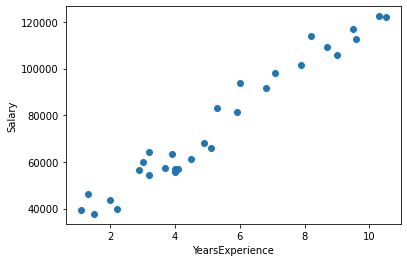

In [0]:
#use matplotlib to plot scatter plot between salary and work experience
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

The graph clearly shows a positive correlation between work exp and salary .

In [0]:
#Correlation strength 
np.corrcoef(df['YearsExperience'],df['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13215fa90>]],
      dtype=object)

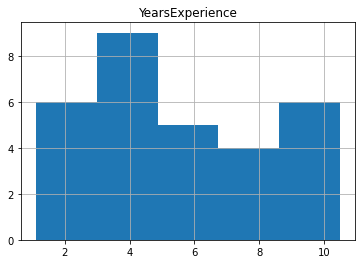

In [0]:
df.hist('YearsExperience',bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1322d2fd0>]],
      dtype=object)

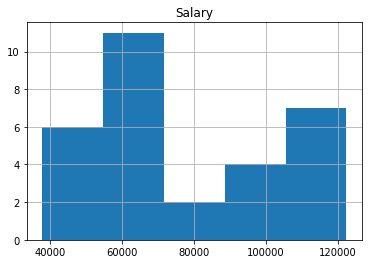

In [0]:
df.hist('Salary',bins=5)

So , we have 0.97 coefficient of correlation between work exp and Salary 

In case , if did not have any other variable apart from Salary , the best estimate of next prediction of Salary would be the mean value of Salary

In [0]:
np.mean(df.Salary)

76003.0

In [0]:
#create the input and output variables
#X =input variable that contains work exp
X=df[['YearsExperience']]
#y=output/target variable that contains salary
y=df[['Salary']]

In [0]:
#import the Linear Regression model from sklearn 
from sklearn.linear_model import LinearRegression

In [0]:
#build and train the Linear Regression model on our input and output data (X,y)
lr=LinearRegression().fit(X,y)

In [0]:
#Accuracy of our LR model 
lr.score(X,y)

0.9569566641435084

So, our linear regression model has 95% accuracy in terms of predicting salary values

### Predictions

* y = what you want to predict ( Salary )
* x = input value ( years of exp)
* y=mx+c
* y=B0+B1*X1
* salary=intercept + coef*(yearsofexp)

In [0]:
#slope of regression line 
lr.coef_[0]

array([9449.96232146])

In [0]:
# B1 = 9449.96

In [0]:
#intercept of regression line
lr.intercept_

array([25792.20019867])

In [0]:
# B0= 25792.2001

## Predict function in Regression 

In [0]:
#create a new column which captures predicted values from LR model 
df['predicted_salary']=lr.predict(X)

In [0]:
df.head(3)

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681


In [0]:
# Predict function ( B0 + B1*X1)

In [0]:
def predict_func(exp):
    intercept=lr.intercept_[0]
    ceof=lr.coef_[0]
    prediction=intercept+(exp*ceof)
    return prediction[0]

In [0]:
pred=predict_func(1.3)
print(pred)

38077.15121656029


## Accuracy 

* TSS = summation of difference( actual sal & mean salary)
* SSE = summation of difference( actual sal & predicted salary)
* SSR = summation of difference(predicted salary & mean salary )

* r2= SSR/TSS

### Residuals (Errors)

In [0]:
#create an additional column to dataset which captures difference amount between actual and predicted salary values
df['residuals']=df['Salary']-df['predicted_salary']

In [0]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681


### Squared residuals 

we have to square the residuals to make the errors positive  

In [0]:
#create an additional column that squares the residuals amount
df['sq_residuals']=df['residuals']**2
    

In [0]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06


## Total sum of squared errors

In [0]:
#create a column which has mean value of salary 
df['mean_salary']=76003.0

In [0]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0


In [0]:
#create a column with difference between salary value and mean salary value
df['errors']=df['Salary']-df['mean_salary']

In [0]:
#create the squared column of errors
df['sq_errors']=df['errors']**2

In [0]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary,errors,sq_errors
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0,-36660.0,1.343956e+09
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0,-29798.0,8.879208e+08
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0,-38272.0,1.464746e+09


In [0]:
SST = np.sum(df['sq_errors'])

In [0]:
print(SST)

21794977852.0


In [0]:
SSE=np.sum(df['sq_residuals'])
print(SSE)

938128551.6684289


### R- Square ( Coefficient of Determination )

In [0]:
SST = SSE + SSR

In [0]:
#The variation explained due to Linear regression model 
SSR=SST-SSE

In [0]:
#ceofficient of determination (SSR/SST)
r_sq=SSR/SST

In [0]:
r_sq

0.9569566641435084

This is the same value which lr.score gave initially while training the model